In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

import logging

In [2]:
def get_logger(name):
    # Create a custom logger
    logger = logging.getLogger(name)
    # Create handlers
    handler = logging.StreamHandler()
    # Create formatters and add it to handlers
    logger_format = logging.Formatter(
        "%(asctime)s@%(name)s:%(levelname)s: %(message)s")
    handler.setFormatter(logger_format)
    # Add handlers to the logger
    logger.addHandler(handler)
    # Set level
    level = logging.getLevelName("INFO")
    logger.setLevel(level)
    return logger

In [3]:
logger = get_logger(__name__)

In [13]:
color_info_list = [
    ["tab20", "matplotlib", "multi_sequential", "categorical", False, False],
    ["tab20b", "matplotlib", "multi_sequential", "categorical", False, False],
    ["tab20c", "matplotlib", "multi_sequential", "categorical", False, False],
    ["Royal2", "wesanderson", "categorical", "categorical", False, False],
    ["Zissou1", "wesanderson", "categorical", "categorical", False, False],
    ["Darjeeling1", "wesanderson", "categorical", "categorical", False, False],
    ["FantasticFox1", "wesanderson", "categorical", "categorical", False, False],
    ["Moonrise3", "wesanderson", "categorical", "categorical", False, False],
    ["Cavalcanti1", "wesanderson", "categorical", "categorical", False, False],
    ["GrandBudapest2", "wesanderson", "categorical", "categorical", False, False],
    ["IsleofDogs2", "wesanderson", "categorical", "categorical", False, False],
    ["batlow10", "scientific_colors", "sequential", "discrete", True, True],
    ["batlow25", "scientific_colors", "sequential", "discrete", True, True],
    ["acton10", "scientific_colors", "sequential", "discrete", True, True],
    ["acton25", "scientific_colors", "sequential", "discrete", True, True],
    ["oslo10", "scientific_colors", "sequential", "discrete", True, True],
    ["oslo25", "scientific_colors", "sequential", "discrete", True, True],
    ["turku10", "scientific_colors", "sequential", "discrete", True, True],
    ["turku25", "scientific_colors", "sequential", "discrete", True, True],
    ["vik10", "scientific_colors", "diverging", "discrete", True, True],
    ["vik25", "scientific_colors", "diverging", "discrete", True, True],
    ["roma10", "scientific_colors", "diverging", "discrete", True, True],
    ["roma25", "scientific_colors", "diverging", "discrete", True, True],
    ["broc10", "scientific_colors", "diverging", "discrete", True, True],
    ["broc25", "scientific_colors", "diverging", "discrete", True, True],
    ["oleron10", "scientific_colors", "multi_sequential", "discrete", True, True],
    ["oleron25", "scientific_colors", "multi_sequential", "discrete", True, True],
    ["batlowS", "scientific_colors", "categorical", "categorical", True, True],
    ["glasbey", "cet", "categorical", "categorical", True, False],
    ["viridis", "matplotlib", "sequential", "continuous", True, True],
    ["inferno", "matplotlib", "sequential", "continuous", True, True],
    ["cividis", "matplotlib", "sequential", "continuous", True, True],
    ["batlow", "scientific_colors", "sequential", "continuous", True, True],
    ["acton", "scientific_colors", "sequential", "continuous", True, True],
    ["oslo", "scientific_colors", "sequential", "continuous", True, True],
    ["turku", "scientific_colors", "sequential", "continuous", True, True],
    ["vik", "scientific_colors", "diverging", "continuous", True, True],
    ["roma", "scientific_colors", "diverging", "continuous", True, True],
    ["broc", "scientific_colors", "diverging", "continuous", True, True],
    ["cwr", "cet", "diverging", "continuous", True, True],
    ["isolum", "cet", "misc", "continuous", True, True],
    ["oleron", "scientific_colors", "multi_sequential", "continuous", True, True],
    ["topo", "ocean", "multi_sequential", "continuous", True, True],
]

In [14]:
color_info_df = pd.DataFrame(
    color_info_list,
    columns=[
        "cm_name",
        "source",
        "cm_class",
        "cm_type",
        "perceptually_uniform",
        "color_blind_friendly"
    ]
)

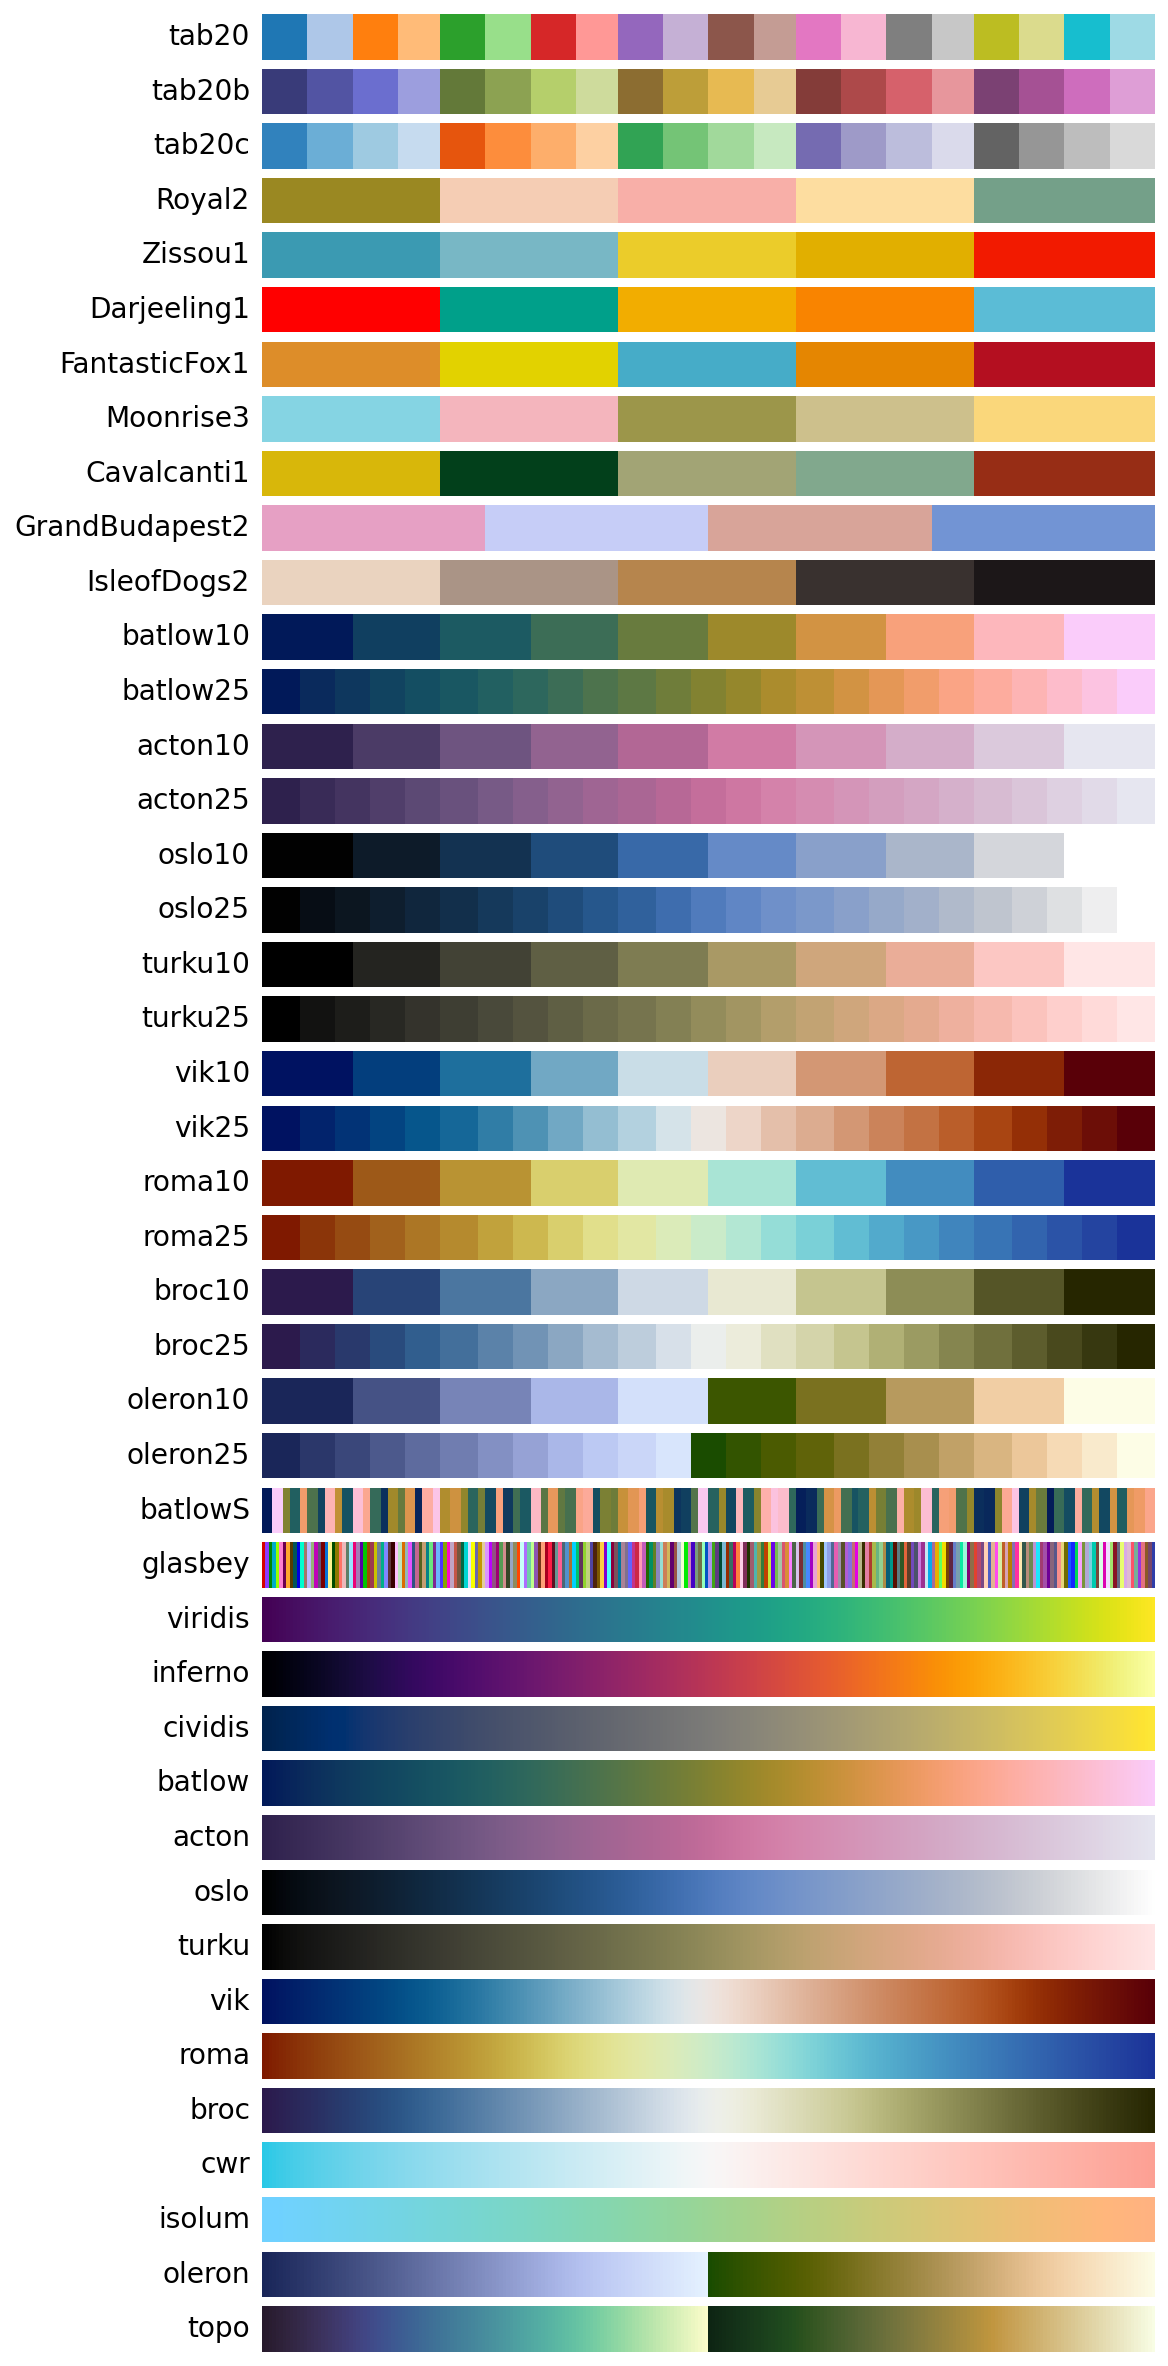

In [15]:
plot_cmaps(cm_class=None, cm_type=None)

In [16]:
color_data_root = "../scicolor"

In [8]:
def _get_matplotlib_cmap(cm_name):
    return plt.get_cmap(cm_name)
    
def _get_scientific_colors(cm_name):
    color_path = os.path.join(color_data_root, "scientific_colors", cm_name + '.txt')
    if cm_name[-1].isdigit():
        with open(color_path) as f:
            colors = [
                line.strip().split(' ')[-1] for line in f.readlines()[2:]
            ]
        return ListedColormap(colors)
    
    cm_data = np.loadtxt(color_path)
    if cm_name[-1] == "S":
        return ListedColormap(cm_data, cm_name)

    return LinearSegmentedColormap.from_list(cm_name, cm_data)

def _get_cet_cmap(cm_name):
    cm_data = np.loadtxt(
        os.path.join(color_dat_root, "cet_colors", cm_name + '.txt'),
        delimiter=','
    )
    return LinearSegmentedColormap.from_list(cm_name, cm_data)

def _get_ocean_cmap(cm_name):
    cm_data = np.loadtxt(
        os.path.join(color_data_root, "ocean_colors", cm_name + '.txt'),
    )
    return LinearSegmentedColormap.from_list(cm_name, cm_data)

def _get_wesanderson_cmap(cm_name):
    wes_mapping = {
        "Royal2": ["#9A8822", "#F5CDB4", "#F8AFA8", "#FDDDA0", "#74A089"],
        "Zissou1": ["#3B9AB2", "#78B7C5", "#EBCC2A", "#E1AF00", "#F21A00"],
        "Darjeeling1": ["#FF0000", "#00A08A", "#F2AD00", "#F98400", "#5BBCD6"],
        "FantasticFox1": ["#DD8D29", "#E2D200", "#46ACC8", "#E58601", "#B40F20"],
        "Moonrise3": ["#85D4E3", "#F4B5BD", "#9C964A", "#CDC08C", "#FAD77B"],
        "Cavalcanti1": ["#D8B70A", "#02401B", "#A2A475", "#81A88D", "#972D15"],
        "GrandBudapest2": ["#E6A0C4", "#C6CDF7", "#D8A499", "#7294D4"],
        "IsleofDogs2" : ["#EAD3BF", "#AA9486", "#B6854D", "#39312F", "#1C1718"]
    }
    return ListedColormap(wes_mapping[cm_name], cm_name)

    
def get_cmap(cm_name):
    if not isinstance(cm_name, str):
        logger.error("Invalid color map name. Please input a string.")
        return None
    
    if cm_name not in set(color_info_df.cm_name):
        logger.error("Color map {} doesn't exist".format(cm_name))
        return None
    
    source = color_info_df.query("cm_name == '{}'".format(
        cm_name)).iloc[0]['source']
    
    cm = {
        'matplotlib': _get_matplotlib_cmap,
        'scientific_colors': _get_scientific_colors,
        'wesanderson': _get_wesanderson_cmap,
        'cet': _get_cet_cmap,
        'ocean': _get_ocean_cmap
    }[source](cm_name)
    return cm
    

def list_cmaps(
    cm_class=None,
    cm_type=None,
    perceptually_uniform=None,
    color_blind_friendly=None
):
    temp_df = color_info_df.drop('source', axis=1)
    if cm_class is not None:
        cm_class_set = set(color_info_df.cm_class)
        if cm_class not in cm_class_set:
            logger.info("Invalid cm_class value, try: {}, or None".format(
                ', '.join(list(cm_class_set))
            ))
        temp_df = temp_df.query("cm_class == '{}'".format(cm_class))
        
    if cm_type is not None:
        cm_type_set = set(color_info_df.cm_type)
        if cm_type not in cm_type_set:
            logger.info("Invalid cm_type value, try: {}, or None".format(
                ', '.join(list(cm_type_set))
            ))
        temp_df = temp_df.query("cm_type == '{}'".format(cm_type))
    if perceptually_uniform:
        temp_df = temp_df.query("perceptually_uniform == True")
    if color_blind_friendly:
        temp_df = temp_df.query("color_blind_friendly == True")
        
    return temp_df


def _plot_cmaps_gradients(cm_list):
    nrows = len(cm_list)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    
    fig, axes = plt.subplots(nrows=nrows, figsize=(8, nrows*0.5))
    if nrows == 1:
        axes = [axes]
    #fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    #axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, (cm_name, cm) in zip(axes, cm_list):
        ax.imshow(gradient, aspect='auto', cmap=cm)
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, cm_name, va='center', ha='right', fontsize=14)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()
    #plt.show()
    
    
def plot_cmaps(
    cm_name=None,
    cm_class=None,
    cm_type=None,
    perceptually_uniform=None,
    color_blind_friendly=None
):
    if cm_name is None:
        color_df = list_cmaps(
            cm_class=cm_class,
            cm_type=cm_type,
            perceptually_uniform=perceptually_uniform,
            color_blind_friendly=color_blind_friendly
        )
        if len(color_df) == 0:
            logger.error("No matched color map found.")
            return None
        cm_name_list = list(color_df.cm_name)
    else:
        if isinstance(cm_name, str):
            cm_name_list = [cm_name]
        elif isinstance(cm_name, list):
            cm_name_list = cm_name
        else:
            logger.error(
                "Invalid color map name(s). Please input a string or a list of strings."
            )
    cm_list = [[temp_name, get_cmap(temp_name)] for temp_name in cm_name_list]
    _plot_cmaps_gradients(cm_list)

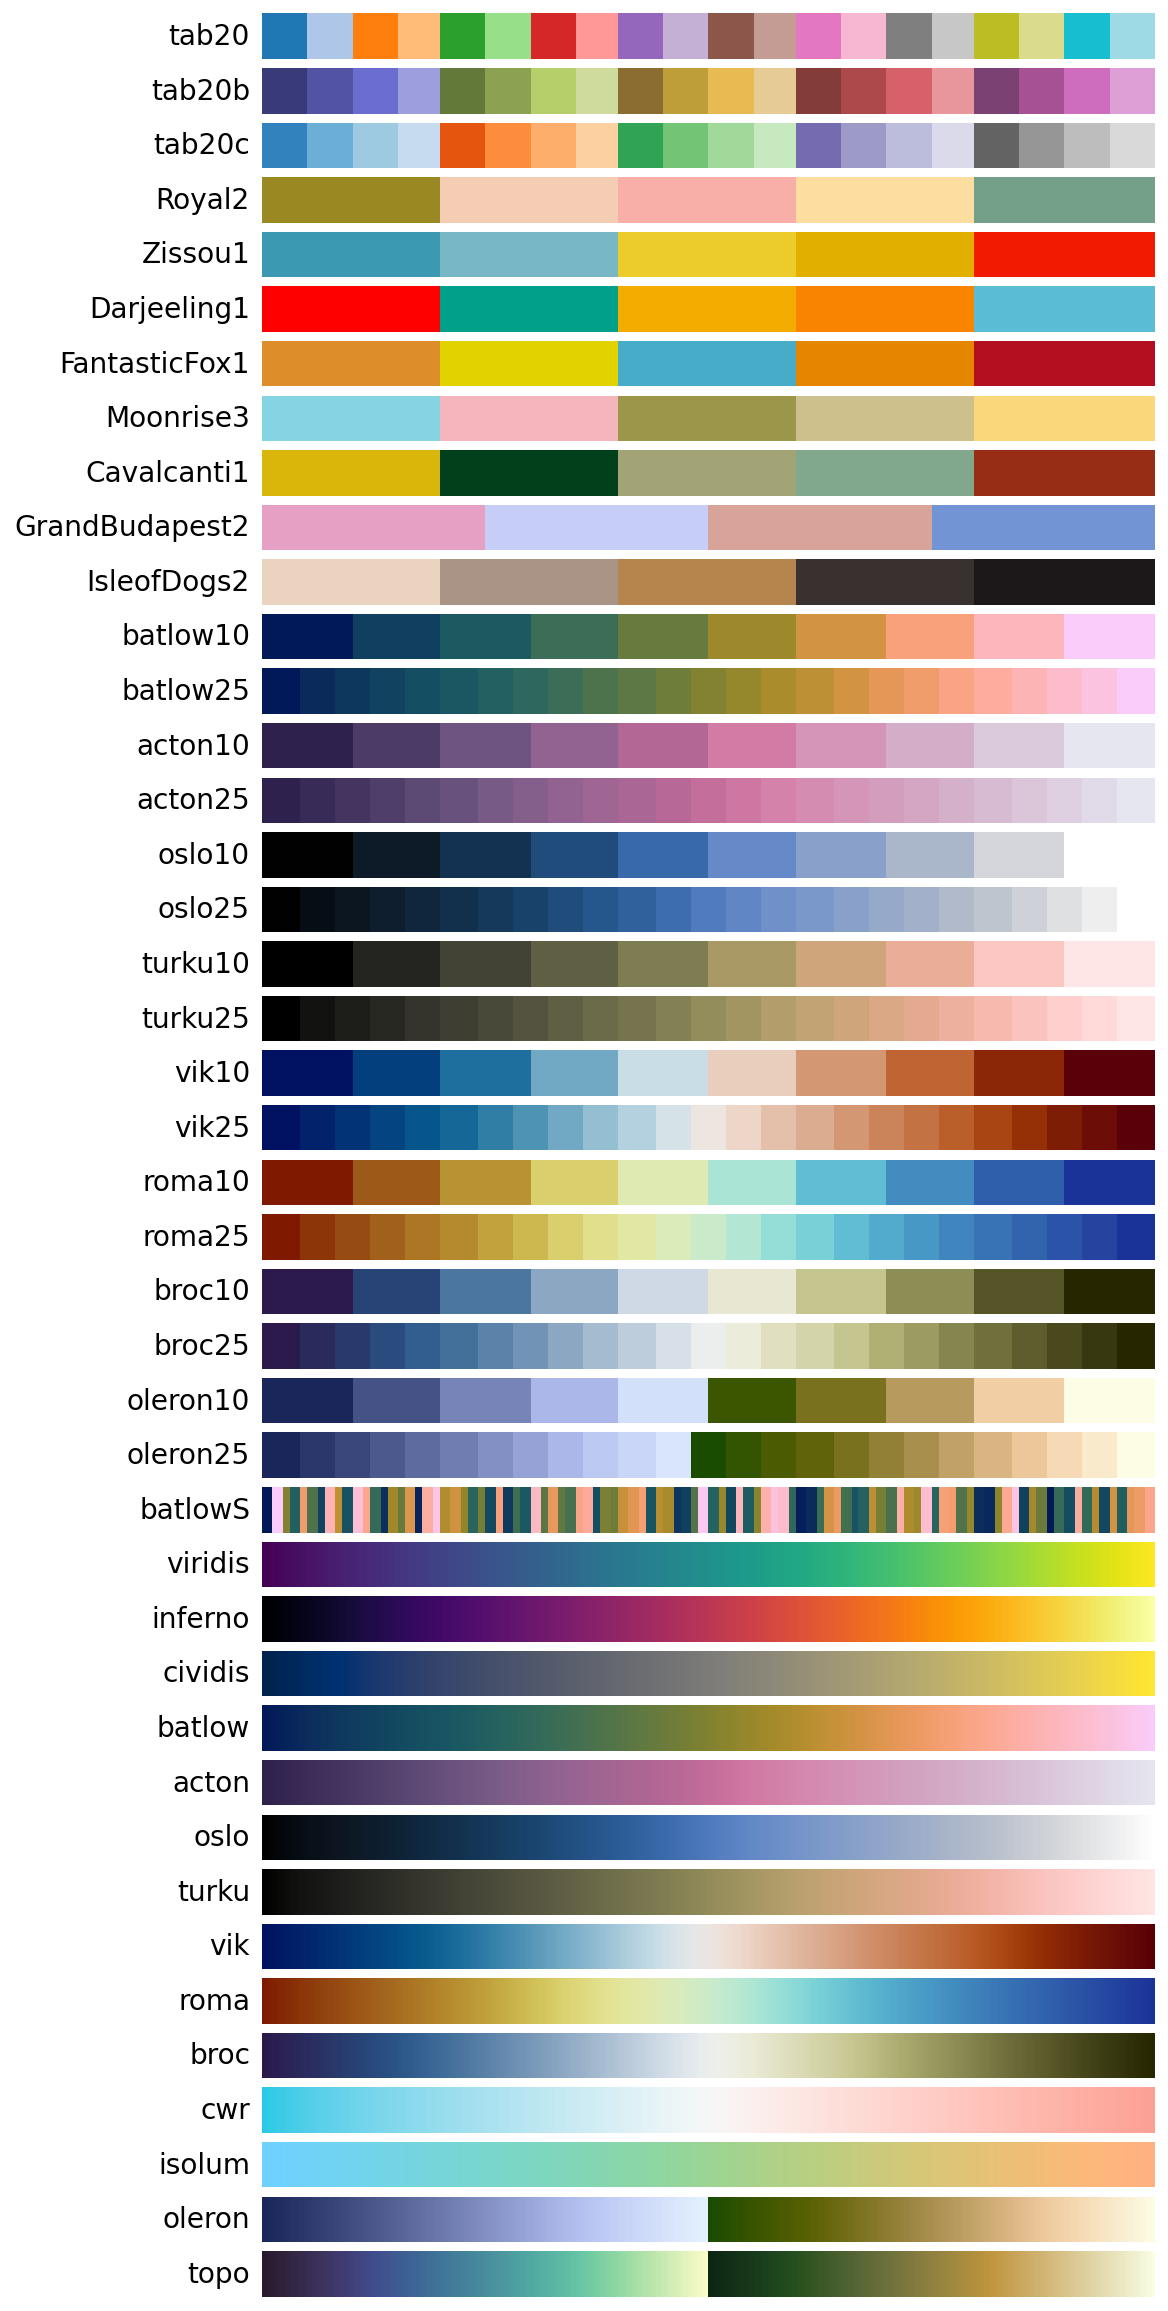

In [9]:
plot_cmaps(cm_class=None, cm_type=None)

In [29]:
plot_cmaps(get_cmap('vik'))

2020-10-31 21:25:46,228@__main__:ERROR: Invalid color map name(s). Please input a string or a list of strings.


UnboundLocalError: local variable 'cm_name_list' referenced before assignment

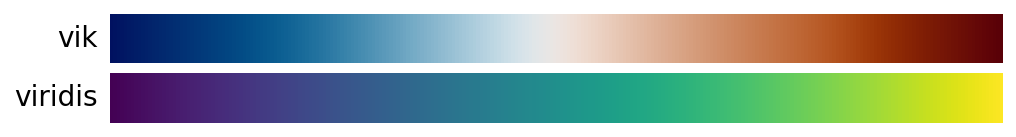

In [10]:
plot_cmaps(['vik', 'viridis'])

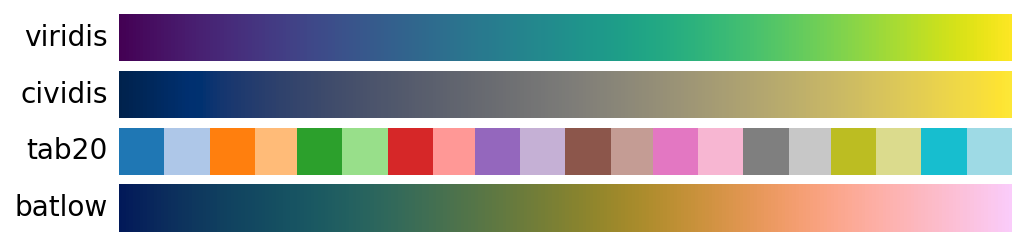

In [12]:
plot_cmaps(cm_name=['viridis', 'cividis', 'tab20', 'batlow'])#cm_class='sequential', cm_type='discrete', color_blind_friendly=True)